Создание и обучение модели

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

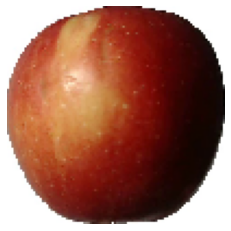

(100, 100, 3)


In [ ]:
#указание тест и тренировочного пути
train_path = '/content/gdrive/MyDrive/Kaggle/fruits-360-original-size/fruits-360-original-size/Training/'
test_path = '/content/gdrive/MyDrive/Kaggle/fruits-360-original-size/fruits-360-original-size/Test/'
#отображение картинки
img = load_img(train_path + "apple_braeburn_1/r0_0.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#вывод картинки из массива
x = img_to_array(img)
print(x.shape)

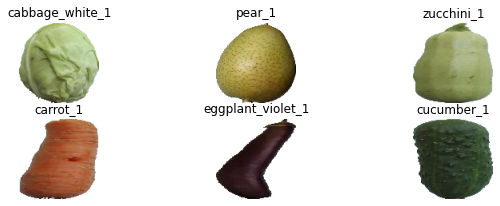

In [ ]:
#визуализация больше картинок
images = ['cabbage_white_1', 'pear_1', 'zucchini_1', 'carrot_1', 'eggplant_violet_1', 'cucumber_1']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/r0_0.jpg", target_size=(100,100)))

In [ ]:
#поиск числа классов
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

24


In [ ]:
#создание модели
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#сборка модели
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#получение суммы модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [ ]:
#Эпохи и размеры корзинок
epochs = 10
batch_size = 64

In [ ]:
#создание картинок для ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

#Генерация пакетов дополненных данных.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [ ]:
#обучение
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

<ipython-input-12-54a208a15b62>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
25/25 [==============================] - 340s 13s/step - loss: 2.8295 - accuracy: 0.1206 - val_loss: 2.3172 - val_accuracy: 0.2656
Epoch 2/10
25/25 [==============================] - 263s 11s/step - loss: 2.2785 - accuracy: 0.2350 - val_loss: 1.7320 - val_accuracy: 0.4440
Epoch 3/10
25/25 [==============================] - 192s 8s/step - loss: 1.8907 - accuracy: 0.3681 - val_loss: 1.3213 - val_accuracy: 0.5391
Epoch 4/10
25/25 [==============================] - 148s 6s/step - loss: 1.5285 - accuracy: 0.4554 - val_loss: 1.2488 - val_accuracy: 0.5143
Epoch 5/10
25/25 [==============================] - 116s 5s/step - loss: 1.1792 - accuracy: 0.5950 - val_loss: 0.6192 - val_accuracy: 0.8151
Epoch 6/10
25/25 [==============================] - 87s 4s/step - loss: 0.9920 - accuracy: 0.6463 - val_loss: 0.4981 - val_accuracy: 0.8815
Epoch 7/10
25/25 [==============================] - 64s 3s/step - loss: 0.7773 - accuracy: 0.7261 - val_loss: 0.4684 - val_accuracy: 0.8503
Epoch 8/10
25

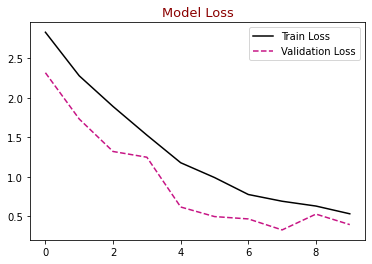

In [ ]:
#создание train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

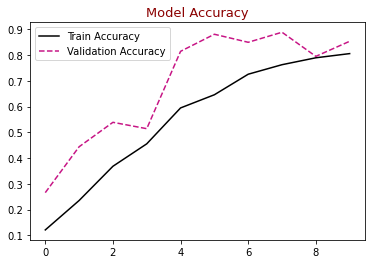

In [ ]:
#создание train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

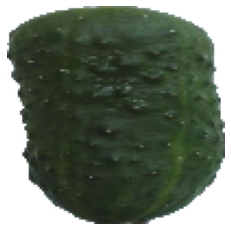

In [ ]:
#Отображение выбранной картинки
img = load_img('/content/gdrive/MyDrive/Kaggle/fruits-360-original-size/fruits-360-original-size/Validation/cucumber_1/r0_1.jpg', target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#загрузка картинки 
def load(filename):
    img = load_img(filename, target_size=(100,100))
    np_image = Image.open(filename)
    np_image = np.array(img).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('/content/gdrive/MyDrive/Kaggle/fruits-360-original-size/fruits-360-original-size/Validation/cucumber_1/r0_1.jpg')

In [ ]:
#Предсказывание класса
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

1/1 [==============================] - 0s 20ms/step
[17]


In [ ]:
def get_class_by_number(dict, num):
  for k in dict.keys():
    if dict[k] == num:
      return k

In [ ]:
print(get_class_by_number(test_generator.class_indices, prediction))

cucumber_1
